### Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples, noise=0.03, random_state=42)

In [2]:
# Visualize the data
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


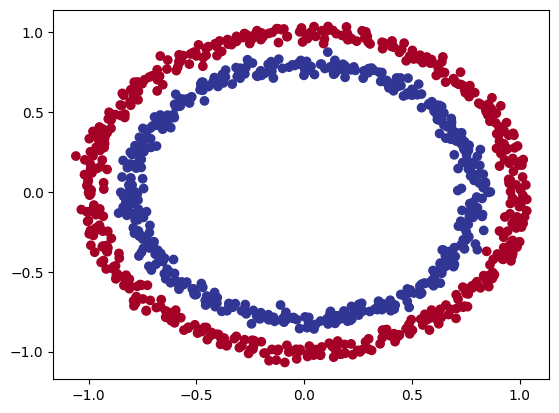

In [3]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)

In [4]:
X.shape, y.shape

((1000, 2), (1000,))

In [5]:
import tensorflow as tf

2023-07-01 22:08:42.887505: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-01 22:08:43.532201: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [6]:
# Setup gpu drivers
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for device in gpu_devices:
    tf.config.experimental.set_memory_growth(device, True)

2023-07-01 22:08:43.994475: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-01 22:08:44.017743: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [7]:
tf.random.set_seed(42)

# 1. Create a model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(),
    metrics="accuracy"
)

# 3. Fit the model
model_1.fit(tf.expand_dims(X, axis=-1), y, epochs=200, verbose=False) 

# 4. Evaluate the model
model_1.evaluate(X, y)

32/32 [==============================] - 0s 431us/step - loss: 0.6935 - accuracy: 0.5000


[0.6934650540351868, 0.5]

### Improving the model

1. Create a model: Add more layers or things related
2. Compile a model: Chosee different optimizers
3. Fitting a model: More epochs

In [8]:
tf.random.set_seed(42)

# 1. Create a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(),
    metrics="accuracy"
)

# 3. Fit the model
model_2.fit(tf.expand_dims(X, axis=-1), y, epochs=200, verbose=False) 

# 4. Evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 0s 488us/step - loss: 0.6955 - accuracy: 0.5000


[0.6954653263092041, 0.5]

In [9]:
# Visualize model prediction
import numpy as np

def plot_decision_boundary(model, X, y):
    # Axis boundary of the plot and meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 100),
        np.linspace(y_min, y_max, 100)
    )
    # Create X value (predictions base on that)
    x_in = np.c_[xx.ravel(), yy.ravel()] # Stack 2D arrays together
    
    # Make predictions
    y_pred = model.predict(x_in)
    
    # Check for multi-class
    if model.output_shape[-1] > 1:
        print('doing multiclass classification')
        # Reshape the prediction to get it ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print('doing binary classification')
        y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)
    
    # Plot the decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 344us/step
doing binary classification


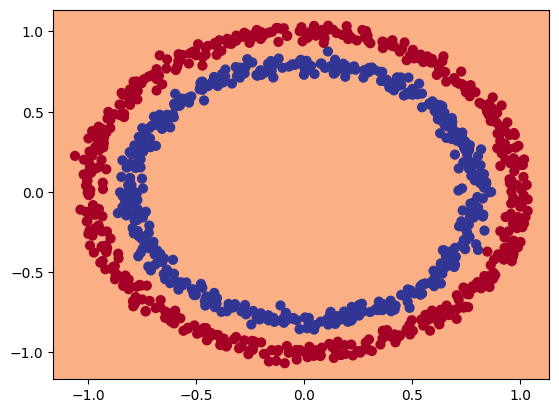

In [10]:
plot_decision_boundary(model_2, X, y)

In [11]:
tf.random.set_seed(42)

# 1. Create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

# 2. Compile the model
model_3.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

# 3. Fit the model
model_3.fit(tf.expand_dims(X, axis=-1), y, epochs=100, verbose=False) 

# 4. Evaluate the model
model_3.evaluate(X, y)

32/32 [==============================] - 0s 483us/step - loss: 0.7558 - accuracy: 0.4970


[0.7558422684669495, 0.49703124165534973]

313/313 [==============================] - 0s 314us/step
doing binary classification


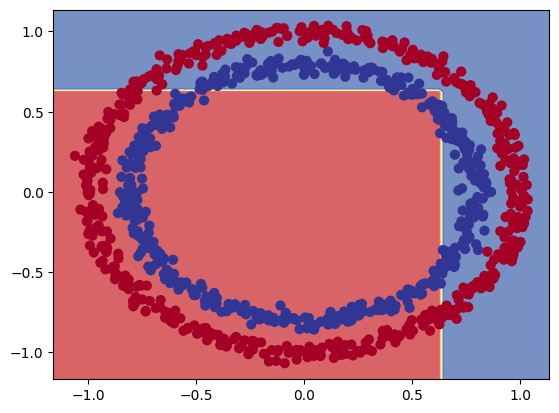

In [12]:
plot_decision_boundary(model_3, X, y)

In [13]:
# Non linear activation

tf.random.set_seed(42)

# 1. Create a model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

# 2. Compile the model
model_4.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

# 3. Fit the model
model_4.fit(tf.expand_dims(X, axis=-1), y, epochs=100, verbose=False) 

# 4. Evaluate the model
model_4.evaluate(X, y)

32/32 [==============================] - 0s 535us/step - loss: 4.5855 - accuracy: 0.4993


[4.585492134094238, 0.49934375286102295]

313/313 [==============================] - 0s 403us/step
doing binary classification


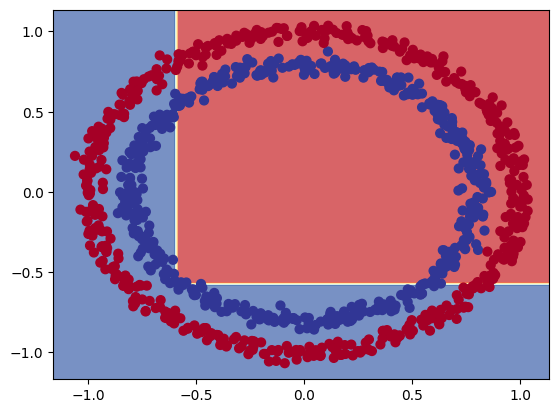

In [14]:
plot_decision_boundary(model_4, X, y)

In [15]:
# Non linear activation with more layers

tf.random.set_seed(42)

# 1. Create a model
model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 1, 4 neurons, ReLU activation
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 2, 4 neurons, ReLU activation
  tf.keras.layers.Dense(1) # ouput layer
])

# 2. Compile the model
model_5.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

# 3. Fit the model
model_5.fit(tf.expand_dims(X, axis=-1), y, epochs=100, verbose=False) 

# 4. Evaluate the model
model_5.evaluate(X, y)

32/32 [==============================] - 0s 465us/step - loss: 0.6931 - accuracy: 0.5041


[0.6931222081184387, 0.5040937662124634]

313/313 [==============================] - 0s 346us/step
doing binary classification


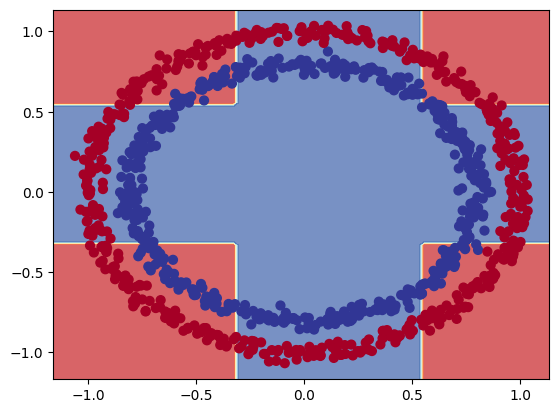

In [16]:
plot_decision_boundary(model_5, X, y)

In [18]:
# Non linear activation with more layers, and sigmoid activation

tf.random.set_seed(42)

# 1. Create a model
model_6 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 1, 4 neurons, ReLU activation
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 2, 4 neurons, ReLU activation
  tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid) # ouput layer
])

# 2. Compile the model
model_6.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

# 3. Fit the model
model_6.fit(X, y, epochs=100, verbose=False) 

# 4. Evaluate the model
model_6.evaluate(X, y)

32/32 [==============================] - 0s 426us/step - loss: 0.3113 - accuracy: 0.9890


[0.31132787466049194, 0.9890000224113464]

313/313 [==============================] - 0s 349us/step
doing binary classification


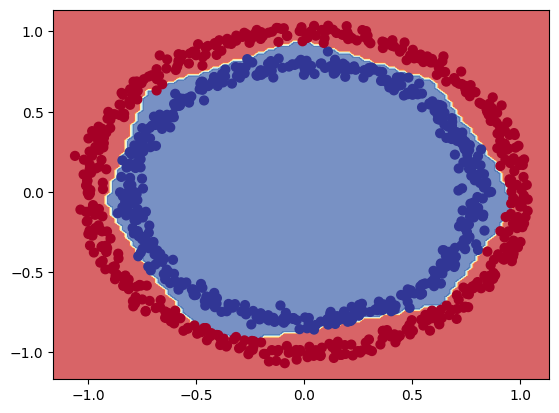

In [19]:
plot_decision_boundary(model_6, X, y)

In [21]:
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

In [25]:
tf.random.set_seed(42)

# 1. Create a model
model_7 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 1, 4 neurons, ReLU activation
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 2, 4 neurons, ReLU activation
  tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid) # ouput layer
])

# 2. Compile the model
model_7.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["accuracy"]
)

# 3. Fit the model
history = model_7.fit(X_train, y_train, epochs=25, verbose=False) 

# 4. Evaluate the model
model_7.evaluate(X_test, y_test)

7/7 [==============================] - 0s 622us/step - loss: 0.0884 - accuracy: 0.9900


[0.08844699710607529, 0.9900000095367432]

313/313 [==============================] - 0s 310us/step
doing binary classification
313/313 [==============================] - 0s 308us/step
doing binary classification


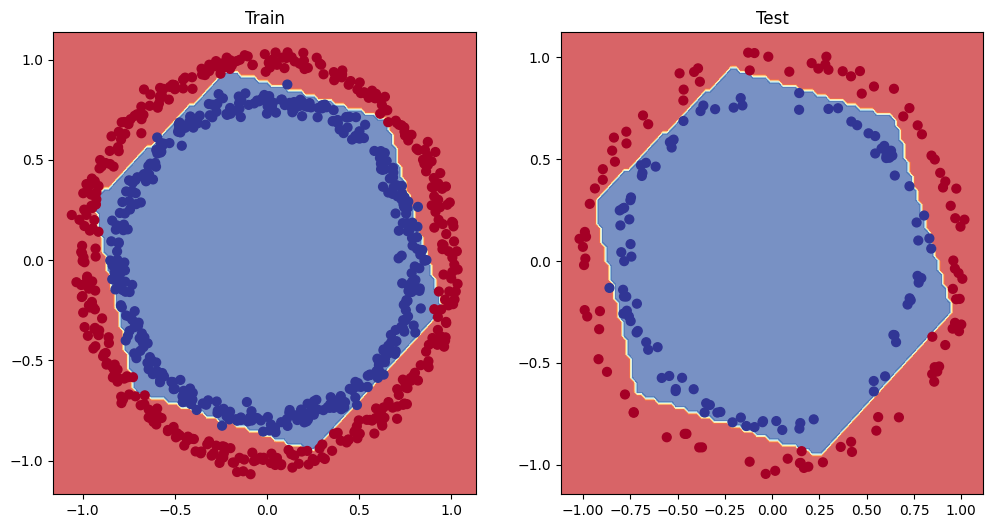

In [26]:
# Plot the decision boundaries
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_7, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_7, X_test, y_test)
plt.show()

In [27]:
pd.DataFrame(history.history)

,loss,accuracy
0,0.690298,0.50000
1,0.682206,0.54875
2,0.672331,0.57125
3,0.660475,0.61750
4,0.642245,0.63500
5,0.613462,0.67875
6,0.581441,0.76250
7,0.547004,0.80125
8,0.500167,0.82250
9,0.459569,0.84500


Text(0.5, 1.0, 'Model 7 loss curves')

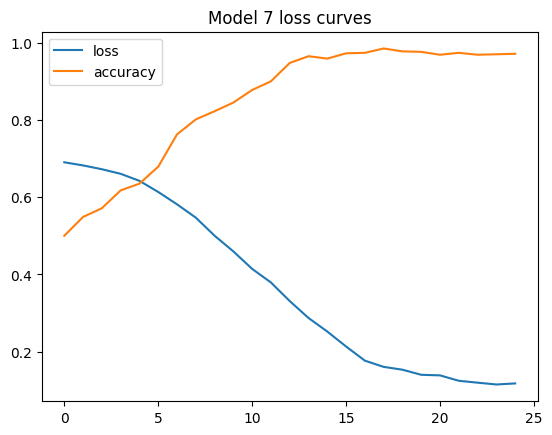

In [28]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model 7 loss curves")

In [41]:
# Finding the best learning rate

tf.random.set_seed(42)

tf.random.set_seed(42)

# 1. Create a model
model_9 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_9.compile(
    loss="binary_crossentropy",
    optimizer="Adam",
    metrics=["accuracy"]
)

# Callback learning rate
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))


# 3. Fit the model
history_9 = model_9.fit(
    X_train, 
    y_train, 
    epochs=100,
    callbacks=[lr_scheduler],
    verbose=True
) 

# 4. Evaluate the model
model_9.evaluate(X_test, y_test)

Epoch 1/100
25/25 [==============================] - 0s 552us/step - loss: 0.6982 - accuracy: 0.4988 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 523us/step - loss: 0.6976 - accuracy: 0.4988 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 510us/step - loss: 0.6969 - accuracy: 0.4988 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 490us/step - loss: 0.6962 - accuracy: 0.4988 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 455us/step - loss: 0.6955 - accuracy: 0.5000 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 470us/step - loss: 0.6947 - accuracy: 0.4988 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 490us/step - loss: 0.6940 - accuracy: 0.4988 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 482us/step - loss: 0.6932 - accuracy: 0.5013 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 

25/25 [==============================] - 0s 478us/step - loss: 0.4776 - accuracy: 0.8500 - lr: 0.3162
Epoch 72/100
25/25 [==============================] - 0s 453us/step - loss: 0.2359 - accuracy: 0.9112 - lr: 0.3548
Epoch 73/100
25/25 [==============================] - 0s 439us/step - loss: 0.3619 - accuracy: 0.8587 - lr: 0.3981
Epoch 74/100
25/25 [==============================] - 0s 466us/step - loss: 0.1943 - accuracy: 0.9237 - lr: 0.4467
Epoch 75/100
25/25 [==============================] - 0s 473us/step - loss: 0.1916 - accuracy: 0.9212 - lr: 0.5012
Epoch 76/100
25/25 [==============================] - 0s 469us/step - loss: 0.1427 - accuracy: 0.9525 - lr: 0.5623
Epoch 77/100
25/25 [==============================] - 0s 449us/step - loss: 0.3752 - accuracy: 0.8712 - lr: 0.6310
Epoch 78/100
25/25 [==============================] - 0s 441us/step - loss: 0.4422 - accuracy: 0.8225 - lr: 0.7079
Epoch 79/100
25/25 [==============================] - 0s 445us/step - loss: 0.6418 - accuracy

[0.6934494972229004, 0.4950000047683716]

Text(0.5, 1.0, 'Model 9 loss curves')

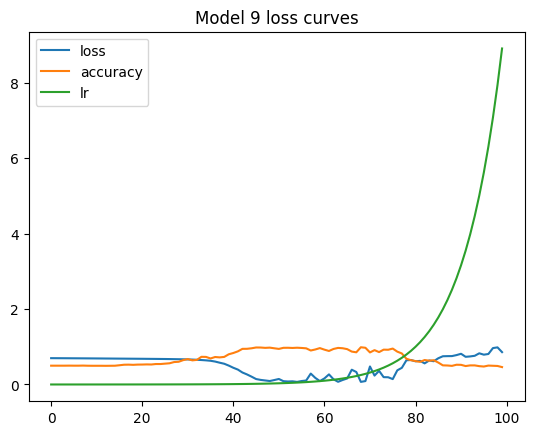

In [42]:
# Plot the loss curves
pd.DataFrame(history_9.history).plot()
plt.title("Model 9 loss curves")

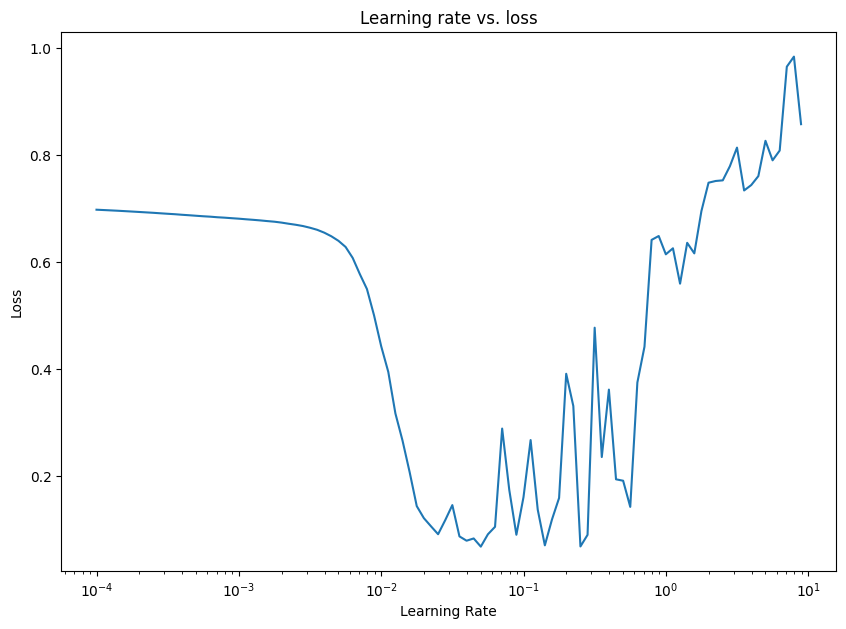

In [44]:

# Learning rate vs loss
lrs = 1e-4 * (10 ** (np.arange(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_9.history["loss"]) # we want the x-axis (learning rate) to be log scale
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");

In [50]:
df = pd.DataFrame(history_9.history)
df

,loss,accuracy,lr
0,0.698179,0.49875,0.000100
1,0.697561,0.49875,0.000112
2,0.696904,0.49875,0.000126
3,0.696239,0.49875,0.000141
4,0.695496,0.50000,0.000158
...,...,...,...
95,0.790490,0.47625,5.623413
96,0.808797,0.50125,6.309574
97,0.965495,0.49625,7.079458
98,0.984326,0.49125,7.943282


In [51]:
df[df.loss == df.loss.min()]

,loss,accuracy,lr
54,0.068436,0.975,0.050119


In [58]:
tf.random.set_seed(42)

# 1. Create the model
model_10 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model with the ideal learning rate
model_10.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                metrics=["accuracy"])

# 3. Fit the model for 20 epochs (5 less than before)
history_10 = model_10.fit(X_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 0s 583us/step - loss: 0.6959 - accuracy: 0.5063
Epoch 2/20
25/25 [==============================] - 0s 517us/step - loss: 0.6733 - accuracy: 0.6050
Epoch 3/20
25/25 [==============================] - 0s 489us/step - loss: 0.6455 - accuracy: 0.6538
Epoch 4/20
25/25 [==============================] - 0s 488us/step - loss: 0.6008 - accuracy: 0.7200
Epoch 5/20
25/25 [==============================] - 0s 464us/step - loss: 0.5513 - accuracy: 0.7550
Epoch 6/20
25/25 [==============================] - 0s 478us/step - loss: 0.4875 - accuracy: 0.7850
Epoch 7/20
25/25 [==============================] - 0s 484us/step - loss: 0.4477 - accuracy: 0.8288
Epoch 8/20
25/25 [==============================] - 0s 482us/step - loss: 0.3920 - accuracy: 0.8438
Epoch 9/20
25/25 [==============================] - 0s 454us/step - loss: 0.2532 - accuracy: 0.9563
Epoch 10/20
25/25 [==============================] - 0s 450us/step - loss: 0.1664 - accuracy: 0.9887

In [59]:
# Evaluate model on the test dataset
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 665us/step - loss: 0.0488 - accuracy: 0.9850


[0.04877712205052376, 0.9850000143051147]

313/313 [==============================] - 0s 317us/step
doing binary classification
313/313 [==============================] - 0s 312us/step
doing binary classification


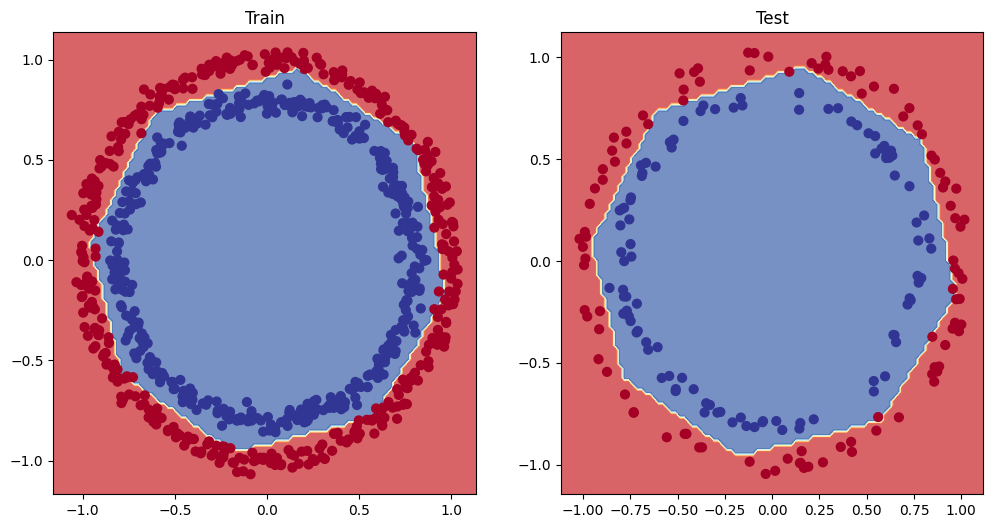

In [60]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_10, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_10, X=X_test, y=y_test)
plt.show()

### Classification evaluation methods

* Accuracy
* Precision
* Recall
* F1-score
* Confussion Metrix
* Classification learning (scikit-learn)

In [61]:
# Check the accuracy of our model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on test set: {loss}")
print(f"Model accuracy on test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 638us/step - loss: 0.0488 - accuracy: 0.9850
Model loss on test set: 0.04877712205052376
Model accuracy on test set: 98.50%


In [69]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_10.predict(X_test)

# Create confusion matrix
# confusion_matrix(y_test, y_preds)
confusion_matrix(y_test, tf.round(y_preds))

7/7 [==============================] - 0s 477us/step


array([[98,  3],
       [ 0, 99]])

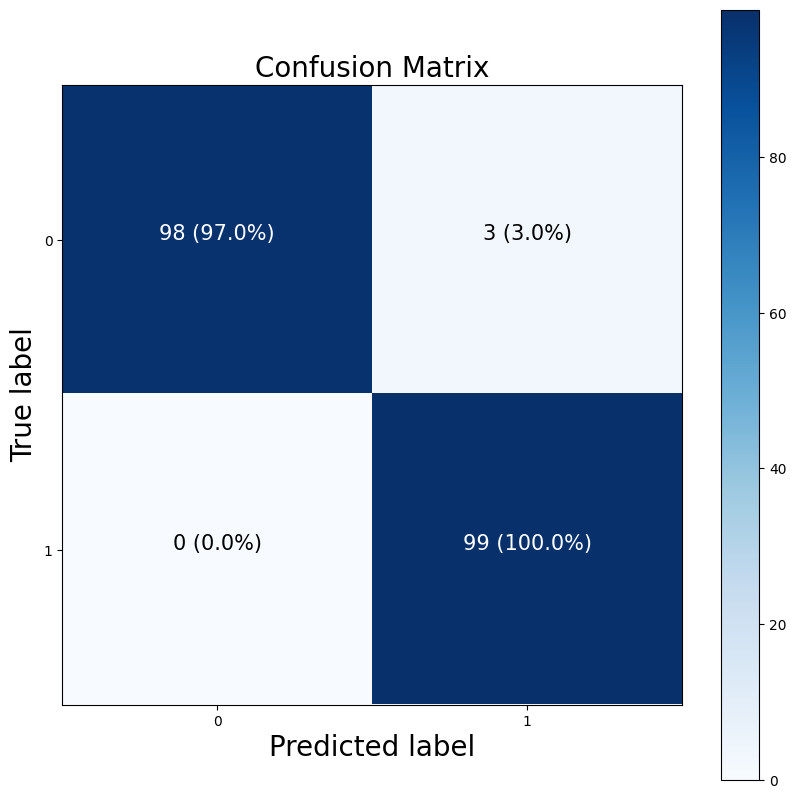

In [70]:
import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

# Multi-class classification problem

### Using a multi class dataset
https://github.com/zalandoresearch/fashion-mnist

In [71]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [72]:
# Show the first training example
print(f"Training sample:\n{train_data[0]}\n") 
print(f"Training label: {train_labels[0]}")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [73]:
# Shape
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [74]:
# Single sample
train_data[0].shape, train_labels[0].shape

((28, 28), ())

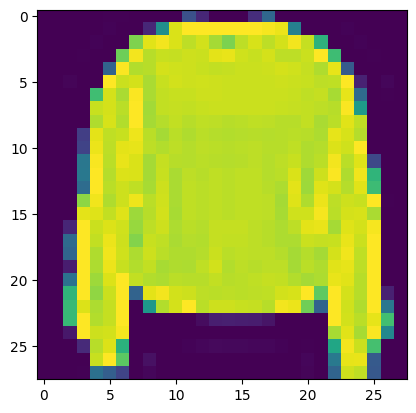

In [75]:
# Visualize a sample
plt.imshow(train_data[7])

In [77]:
# Labels for the dataset
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

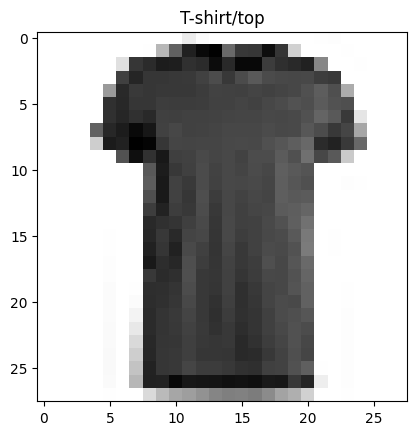

In [78]:
# Sample image and label
plt.imshow(train_data[17], cmap=plt.cm.binary) # change the colours to black & white
plt.title(class_names[train_labels[17]]);

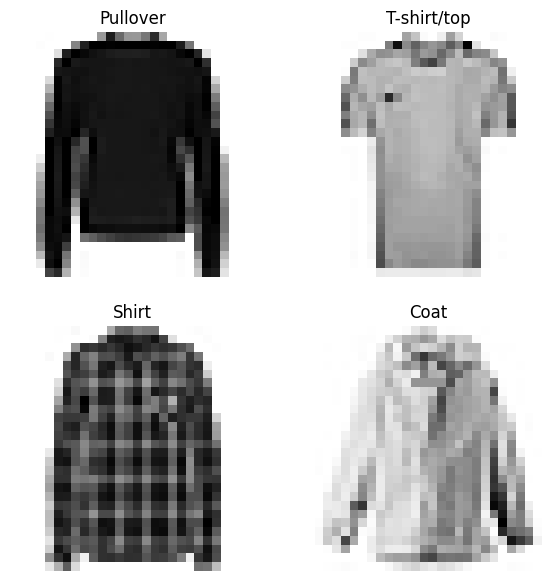

In [80]:
# Random sample images
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

### Building the model
* The input shape is 28x28 tensors (image size)
* The output shape is 10, which is the different categories for the images
* The activation would be softmax, due to being a multi-class classification (sigmoid is used on binary classifications)
* For the loss function, due to multi-class classification.
  - For integer inputs, as we have, we will use SparseCategoricalCrossentropy
  - For hot encoded inputs, we would use CategoricalCrossentropy

In [81]:
tf.random.set_seed(42)

# Create the model
model_11 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # Images are 28 x 28
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # 10 categories, multi-class
])

# Compile the model
model_11.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(), # multi-class classification
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"])

# Fit the model
history_11 = model_11.fit(
    train_data,
    train_labels,
    epochs=10,
    validation_data=(test_data, test_labels)
)

Epoch 1/10
1875/1875 [==============================] - 1s 589us/step - loss: 2.4491 - accuracy: 0.0980 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 1s 557us/step - loss: 2.3026 - accuracy: 0.0987 - val_loss: 2.3038 - val_accuracy: 0.1001
Epoch 3/10
1875/1875 [==============================] - 1s 562us/step - loss: 2.3032 - accuracy: 0.1008 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 1s 553us/step - loss: 2.3027 - accuracy: 0.0976 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 1s 546us/step - loss: 2.3026 - accuracy: 0.0972 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 1s 560us/step - loss: 2.3027 - accuracy: 0.0991 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 1s 580us/step - loss: 2.3027 - accuracy: 0.0988 - val_loss: 2.3026 -

In [82]:
model_11.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_60 (Dense)            (None, 4)                 3140      
                                                                 
 dense_61 (Dense)            (None, 4)                 20        
                                                                 
 dense_62 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [85]:
train_data.min(), train_data.max()

(0, 255)

In [86]:
# Divide train and test images by the maximum value (normalize it)
train_data = train_data / 255.0
test_data = test_data / 255.0

# Check the min and max values of the training data
train_data.min(), train_data.max()

(0.0, 1.0)

In [87]:
tf.random.set_seed(42)

# Create the model
model_12 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_12.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

history_12 = model_12.fit(
    train_data,
    train_labels,
    epochs=10,
    validation_data=(test_data, test_labels)
)

Epoch 1/10


2023-07-02 16:28:50.609225: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 1s 605us/step - loss: 1.0743 - accuracy: 0.6054 - val_loss: 0.7685 - val_accuracy: 0.7302
Epoch 2/10
1875/1875 [==============================] - 1s 559us/step - loss: 0.7074 - accuracy: 0.7530 - val_loss: 0.7028 - val_accuracy: 0.7527
Epoch 3/10
1875/1875 [==============================] - 1s 530us/step - loss: 0.6514 - accuracy: 0.7723 - val_loss: 0.6558 - val_accuracy: 0.7711
Epoch 4/10
1875/1875 [==============================] - 1s 546us/step - loss: 0.6228 - accuracy: 0.7823 - val_loss: 0.6392 - val_accuracy: 0.7793
Epoch 5/10
1875/1875 [==============================] - 1s 522us/step - loss: 0.6058 - accuracy: 0.7875 - val_loss: 0.6246 - val_accuracy: 0.7847
Epoch 6/10
1875/1875 [==============================] - 1s 540us/step - loss: 0.5927 - accuracy: 0.7931 - val_loss: 0.6324 - val_accuracy: 0.7824
Epoch 7/10
1875/1875 [==============================] - 1s 512us/step - loss: 0.5852 - accuracy: 0.7948 - val_loss: 0.6271 - val_accura

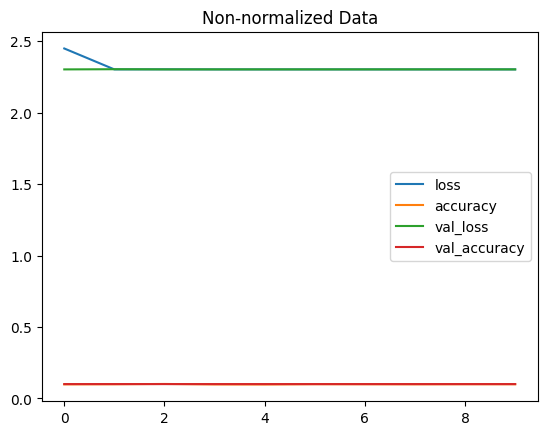

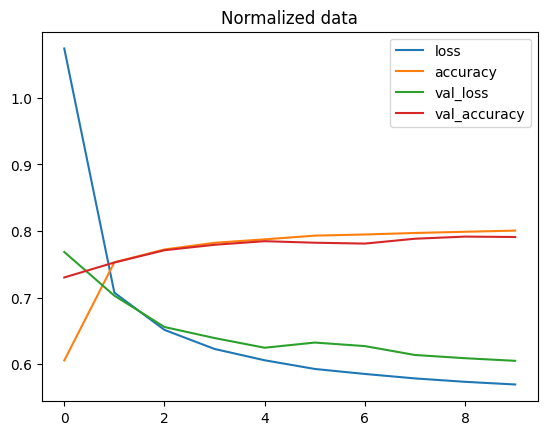

In [88]:
import pandas as pd
# Plot non-normalized data loss curves
pd.DataFrame(history_11.history).plot(title="Non-normalized Data")
# Plot normalized data loss curves
pd.DataFrame(history_12.history).plot(title="Normalized data");

### Finding ideal learning rate

In [93]:
tf.random.set_seed(42)

# Create the model
model_13 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_13.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
history_13 = model_13.fit(
    train_data,
    train_labels,
    epochs=40,
    validation_data=(test_data, test_labels),
    callbacks=[lr_scheduler]
)

Epoch 1/40


2023-07-02 16:37:36.735360: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 1s 577us/step - loss: 1.2332 - accuracy: 0.5276 - val_loss: 0.8972 - val_accuracy: 0.6610 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 1s 540us/step - loss: 0.7539 - accuracy: 0.7279 - val_loss: 0.6928 - val_accuracy: 0.7559 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 1s 548us/step - loss: 0.6430 - accuracy: 0.7653 - val_loss: 0.6627 - val_accuracy: 0.7474 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 1s 555us/step - loss: 0.6130 - accuracy: 0.7690 - val_loss: 0.6275 - val_accuracy: 0.7606 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 1s 526us/step - loss: 0.5969 - accuracy: 0.7727 - val_loss: 0.6551 - val_accuracy: 0.7619 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 1s 547us/step - loss: 0.5749 - accuracy: 0.7896 - val_loss: 0.5852 - val_accuracy: 0.8030 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 1

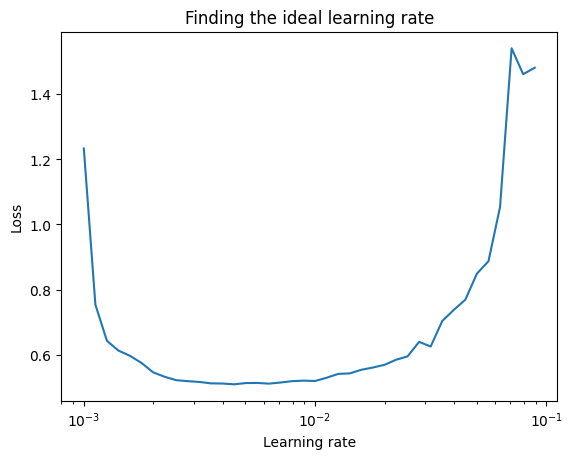

In [94]:
# Plot the learning rate decay curve
lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, history_13.history["loss"]) # want the x-axis to be log-scale
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

In [96]:
tf.random.set_seed(42)

# Create the model
model_14 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_14.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(lr=0.001), # ideal learning rate (same as default)
    metrics=["accuracy"]
)

# Fit the model
history_14 = model_14.fit(
    train_data,
    train_labels,
    epochs=20,
    validation_data=(test_data, test_labels)
)

Epoch 1/20


2023-07-02 16:39:19.266177: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 2s 869us/step - loss: 1.1666 - accuracy: 0.5521 - val_loss: 0.8217 - val_accuracy: 0.7029
Epoch 2/20
1875/1875 [==============================] - 1s 529us/step - loss: 0.7416 - accuracy: 0.7395 - val_loss: 0.7252 - val_accuracy: 0.7488
Epoch 3/20
1875/1875 [==============================] - 1s 548us/step - loss: 0.6710 - accuracy: 0.7680 - val_loss: 0.6718 - val_accuracy: 0.7653
Epoch 4/20
1875/1875 [==============================] - 1s 548us/step - loss: 0.6202 - accuracy: 0.7873 - val_loss: 0.6040 - val_accuracy: 0.7934
Epoch 5/20
1875/1875 [==============================] - 1s 559us/step - loss: 0.5558 - accuracy: 0.8077 - val_loss: 0.5836 - val_accuracy: 0.8025
Epoch 6/20
1875/1875 [==============================] - 1s 532us/step - loss: 0.5313 - accuracy: 0.8173 - val_loss: 0.5627 - val_accuracy: 0.8068
Epoch 7/20
1875/1875 [==============================] - 1s 532us/step - loss: 0.5192 - accuracy: 0.8229 - val_loss: 0.5621 - val_accura

In [97]:
# Make predictions with the most recent model
y_probs = model_14.predict(test_data)

# View the first 5 predictions
y_probs[:5]

313/313 [==============================] - 0s 337us/step


array([[1.3470788e-07, 6.9549644e-17, 3.2447618e-11, 8.8851095e-09,
        4.5845400e-11, 1.7191356e-01, 1.7854867e-07, 2.6143959e-01,
        6.7206885e-05, 5.6657922e-01],
       [7.3384173e-04, 7.2311868e-06, 7.5577766e-01, 7.8419231e-05,
        1.4429037e-01, 6.3465958e-21, 9.9111453e-02, 0.0000000e+00,
        1.0452184e-06, 0.0000000e+00],
       [9.9208759e-05, 9.9861079e-01, 5.8030046e-04, 6.6347362e-04,
        3.6006906e-05, 6.6792849e-17, 1.0349823e-05, 0.0000000e+00,
        7.1316515e-11, 5.3181733e-29],
       [3.5244608e-05, 9.9725300e-01, 8.6014166e-05, 2.5694412e-03,
        5.2579959e-05, 3.7742432e-17, 3.7831508e-06, 0.0000000e+00,
        1.9629720e-10, 2.7541622e-25],
       [1.9214746e-01, 9.0404628e-06, 1.3261165e-01, 1.0309524e-02,
        8.9768153e-03, 1.5609184e-09, 6.5485656e-01, 0.0000000e+00,
        1.0889489e-03, 6.0322029e-30]], dtype=float32)

In [98]:
# See the predicted class number and label for the first example
y_probs[0].argmax(), class_names[y_probs[0].argmax()]

(9, 'Ankle boot')

In [99]:
# Convert all of the predictions from probabilities to labels
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [100]:
confusion_matrix(y_true=test_labels, y_pred=y_preds)

array([[751,   9,  20,  61,   5,   7, 134,   0,  13,   0],
       [  2, 954,  10,  27,   4,   0,   2,   0,   1,   0],
       [ 16,   8, 680,   9, 162,   1, 122,   0,   2,   0],
       [ 28,  19,   7, 834,  41,   3,  63,   0,   5,   0],
       [  2,   2, 106,  24, 785,   0,  74,   0,   7,   0],
       [  0,   0,   0,   0,   0, 934,   0,  34,   8,  24],
       [131,   1, 103,  44, 134,   3, 572,   0,  12,   0],
       [  0,   0,   0,   0,   0,  44,   0, 930,   1,  25],
       [  1,   0,   1,  12,  14,  19,  61,   3, 889,   0],
       [  0,   0,   0,   0,   0,  45,   0,  55,   1, 899]])

In [102]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

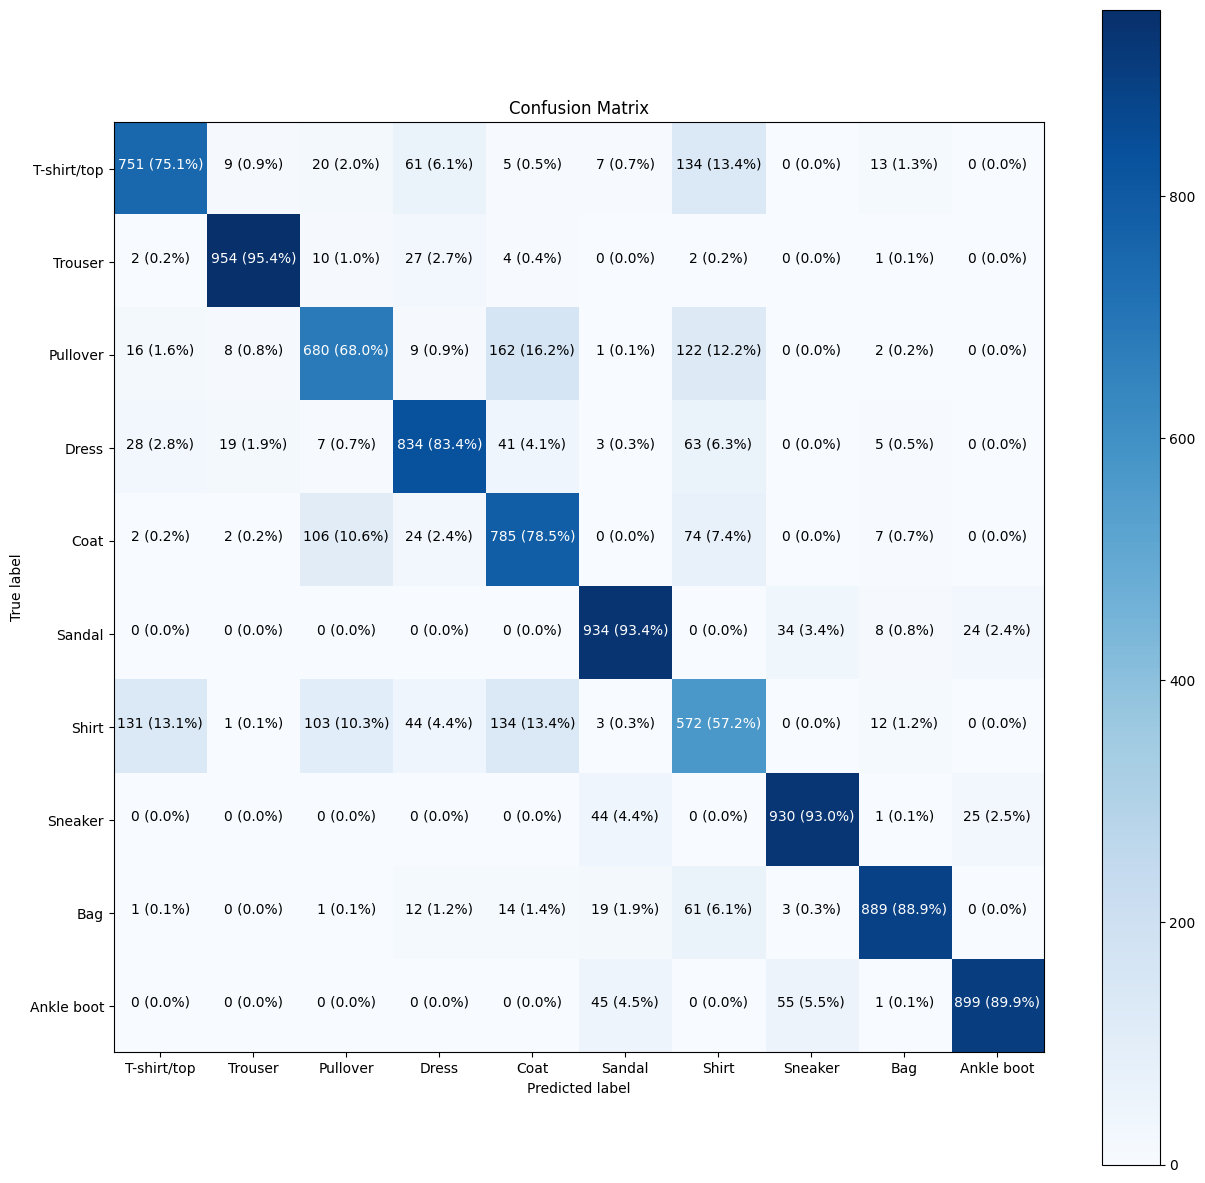

In [103]:
make_confusion_matrix(
    y_true=test_labels, 
    y_pred=y_preds,
    classes=class_names,
    figsize=(15, 15),
    text_size=10
)     

From the confusion diagram, the shirt recognission is a problem

In [104]:
import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.
  
  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """ 
  # Setup random integer
  i = random.randint(0, len(images))
  
  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red

1/1 [==============================] - 0s 13ms/step


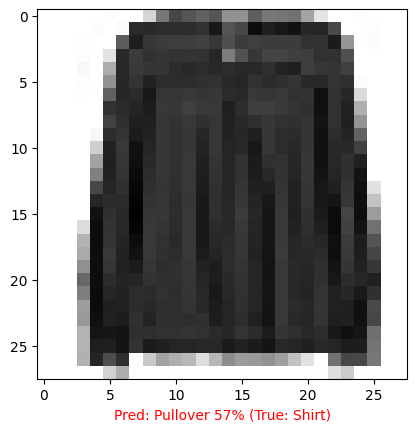

In [130]:
# Check out a random image as well as its prediction
plot_random_image(model=model_14, 
                  images=test_data, 
                  true_labels=test_labels, 
                  classes=class_names)

### Check what the model is learning

In [131]:
# Find the layers of our most recent model
model_14.layers

In [132]:
# Extract a particular layer
model_14.layers[1]

In [133]:
# Get the patterns of a layer in our network
weights, biases = model_14.layers[1].get_weights()

# Shape = 1 weight matrix the size of our input data (28x28) per neuron (4)
weights, weights.shape

(array([[ 0.7103332 ,  0.02028039, -0.6672266 , -0.0242403 ],
        [ 0.29193154,  0.11556435, -0.7383369 ,  0.1732033 ],
        [ 0.6747283 ,  0.7795421 , -0.7435818 , -0.40305057],
        ...,
        [-0.09666031,  0.17434104, -0.2544218 , -0.49760357],
        [-1.0592295 , -0.23944984,  0.21985164, -0.85317206],
        [ 0.1370681 ,  0.06199812, -0.50072557, -0.3165444 ]],
       dtype=float32),
 (784, 4))

In [134]:
# Can now calculate the number of paramters in our model
model_14.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_72 (Dense)            (None, 4)                 3140      
                                                                 
 dense_73 (Dense)            (None, 4)                 20        
                                                                 
 dense_74 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


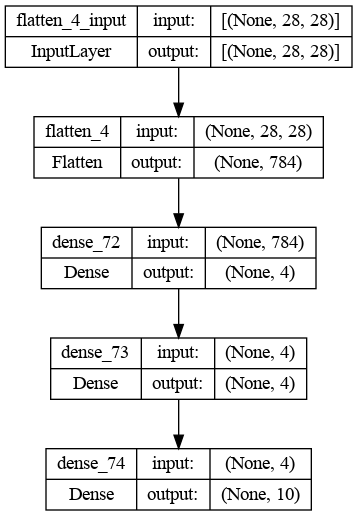

In [136]:
from tensorflow.keras.utils import plot_model

# See the inputs and outputs of each layer
plot_model(model_14, show_shapes=True)